# AB Testing for Facebook Bidding Strategies

The ultimate success metric for bombabomba.com is Number of Purchases.Therefore, we should focus on Purchase metrics for statistical testing.

* How would you define the hypothesis of this A/B test?
* Can we conclude statistically significant results?
* Which statistical test did you use, and why?
* Based on your answer to Question 2, what would be your recommendation to client?
-----------------------------------------

## How would you define the hypothesis of this A/B test?
* **H0** : There is no statistically significant difference between the Control group that was served the “maximum bidding” campaign and the Test group that was served the “average bidding” campaign.

* **H1** : There is a statistically significant difference between the Control group that was served the “maximum bidding” campaign and the Test group that was served the “average bidding” campaign.

In [1]:
# Libraries
import pandas as pd
from scipy.stats import shapiro
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data
# avg bidding
control = pd.read_excel("ab_testing_data.xlsx",
                        sheet_name="Control Group")
control.name = "control"
# max bidding
test = pd.read_excel("ab_testing_data.xlsx",
                     sheet_name="Test Group")
test.name = "test"

In [3]:
control_purchase = control[["Purchase"]]
test_purchase = test[["Purchase"]]

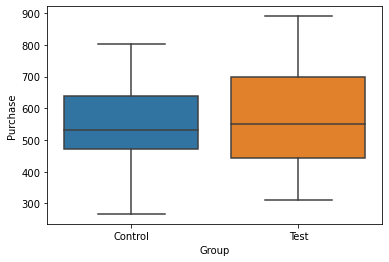

In [4]:
control["Group"] = "Control"
test["Group"] = "Test"
Data = pd.concat([control, test], ignore_index=True)
sns.boxplot(x="Group", y="Purchase", data=Data);

## Can we conclude statistically significant results?

**1.Checking Assumptions**
  * Normal Distribution 
  * Homogeneity of Variance

**2.Implementing Hypothesis**



### Normal Distribution
**Shapiro - Wilk Test**
* **H0**: The data follows a normal distribution.

* **H1**: The data does not follow a normal distribution.

In [35]:
# Shapiro-Wilks Test for control group
test_statistic, pvalue = shapiro(control["Purchase"])
print('Test statistic = %.4f,p-value = %.4f' % (test_statistic, pvalue))

Test statistic = 0.9773,p-value = 0.5891


In [37]:
pvalue < 0.05 

False

p-value greater then 0.05 so H0 is not rejected for control group

In [32]:
# Shapiro-Wilks Test for control test
test_statistic, pvalue = shapiro(test["Purchase"])
print('Test statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test statistic = 0.9589, p-value = 0.1541


In [38]:
pvalue < 0.05

False

p-value greater then 0.05 so H0 is not rejected for test group.

**Assumption is provided. The data follows a normal distribution.**

### Homogeneity of Variance
**Levene Testt**
* **H0**: There is no difference between the variance of the both groups

* **H1**: There is a significant difference between the variance of the both groups.

In [42]:
# Levene test for homogeneity of variance

test_statistic,pvalue = stats.levene(control["Purchase"],
                                        test["Purchase"])
print('Test statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test statistic = 2.6393, p-value = 0.1083


In [43]:
pvalue < 0.05

False

p-value greater then 0.05 so H0 is not rejected.

-----------------------
**If normality assumption is provided but variance homogeneity is not provided:**
  * Two Independent Sample T Test Function equal_var = True
  
**If the assumptions are not provided:**
  * Mann Whitney - U test
------------------------ 

In [44]:
# Indepented Two Sample T-Test
test_statistic, pvalue = stats.ttest_ind(control["Purchase"],
                                           test["Purchase"],
                                           equal_var=True)
print('Test statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test statistic = -0.9416, p-value = 0.3493


In [45]:
pvalue < 0.05

False

p-value greater then 0.05 so H0 is not rejected.

**There is no statistically significant difference between the Control group that was served “maximum bidding” campaign and Test group that was served “average bidding” campaign.**

## Which statistical test did we use, and why?

An assumption of normality and variance homogeneity is provided. Therefore, the Independent Two-Sample T-Test, which is a parametric test
used.

## What would be our recommendation to the client?

Hypothesis test result in two groups the difference between It is not statistically significant. In this case the average bidding to the interests of the company It can be said that it will not be useful.